In [18]:
import os
PATH = 'C:/Users/user/DataPreprocessing/ModelingDataset/data'
os.chdir(PATH)

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv("./dataset_final.csv", sep = ',', encoding = 'cp949')

In [20]:
data.drop('Unnamed: 0', axis = 1,inplace = True)
data.set_index('insertTime', inplace= True)

In [21]:
data

,mmsi,speed,shipLat,shipLon,tideLevel,windSpeed,windDirec,temp,pressure,totalWeight,shipUse,arrivalTime,rest_dist
insertTime,,,,,,,,,,,,,
2022-11-30 16:33:00,371369000,8.796296,37.264305,126.245270,176.0,2.6,북서,-3.1,1032.6,18085,풀컨테이너선,1671087900,37055.892919
2022-12-29 23:23:00,371369000,5.144033,36.960186,126.101601,517.0,2.2,서,2.7,1031.7,18085,풀컨테이너선,1672368900,69352.916750
2022-12-29 23:39:00,371369000,5.041152,36.990513,126.137215,487.0,1.4,남서,2.4,1031.6,18085,풀컨테이너선,1672368900,64739.187778
2022-12-29 23:37:00,371369000,5.041152,36.988640,126.134674,490.0,2.2,서남서,2.4,1031.6,18085,풀컨테이너선,1672368900,65043.247084
2022-12-29 23:40:00,371369000,4.989712,36.993187,126.140976,485.0,1.9,남서,2.4,1031.6,18085,풀컨테이너선,1672368900,64297.611382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 23:41:00,441174000,5.195473,37.028133,126.192680,483.0,2.6,남남서,2.3,1031.6,16717,풀컨테이너선,1672368300,35499.387933
2022-12-29 23:42:00,441174000,5.555556,37.031849,126.197449,482.0,2.0,남서,2.3,1031.6,16717,풀컨테이너선,1672368300,35172.042374
2022-12-29 23:43:00,441174000,5.709877,37.033585,126.199715,480.0,1.8,서남서,2.2,1031.6,16717,풀컨테이너선,1672368300,34393.687393


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53244 entries, 2022-11-30 16:33:00 to 2022-12-29 23:47:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mmsi         53244 non-null  int64  
 1   speed        53244 non-null  float64
 2   shipLat      53244 non-null  float64
 3   shipLon      53244 non-null  float64
 4   tideLevel    53244 non-null  float64
 5   windSpeed    53244 non-null  float64
 6   windDirec    53244 non-null  object 
 7   temp         53244 non-null  float64
 8   pressure     53244 non-null  float64
 9   totalWeight  53244 non-null  int64  
 10  shipUse      53244 non-null  object 
 11  arrivalTime  53244 non-null  int64  
 12  rest_dist    53244 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 5.7+ MB


### 변수간 상관관계 확인

In [23]:
# 히트맵

# import seaborn as sns
# cor = data.corr()
# plt.figure(figsize = (15,15))
# sns.heatmap(cor, vmax = 1, square = True, annot = True)
# plt.savefig('corr.png', dpi = 100) 

In [24]:
# 산점도

# from pandas.plotting import scatter_matrix
# plt.figure(figsize = (15,15))
# scatter_matrix(data, figsize = (15,16))
# plt.show()
# plt.savefig('scatter_data.png', dpi = 100) 

In [25]:
# 인코딩을 위해서 mmsi를 str 타입으로 변환
data['mmsi'] = data['mmsi'].astype(str)

### 3. 인코딩
- one_hot_encoding: shipUse, windDirec, month, date, hour, minute, day
- from sklearn.preprocessing import OneHotEncoder

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

df_ohe = data[['mmsi','windDirec','shipUse']]
df_ohe

,mmsi,windDirec,shipUse
insertTime,,,
2022-11-30 16:33:00,371369000,북서,풀컨테이너선
2022-12-29 23:23:00,371369000,서,풀컨테이너선
2022-12-29 23:39:00,371369000,남서,풀컨테이너선
2022-12-29 23:37:00,371369000,서남서,풀컨테이너선
2022-12-29 23:40:00,371369000,남서,풀컨테이너선
...,...,...,...
2022-12-29 23:41:00,441174000,남남서,풀컨테이너선
2022-12-29 23:42:00,441174000,남서,풀컨테이너선
2022-12-29 23:43:00,441174000,서남서,풀컨테이너선


In [27]:
ohe_dataset = pd.get_dummies(df_ohe)
ohe_dataset

,mmsi_209138000,mmsi_219029742,mmsi_228408700,mmsi_235086166,mmsi_235111726,mmsi_249717000,mmsi_255708000,mmsi_255806072,mmsi_255806127,mmsi_308234000,...,shipUse_석유제품 운반선,shipUse_세미(혼재)컨테이너선,shipUse_시멘트운반선,shipUse_압항 예선,shipUse_원유운반선,shipUse_일반화물선,shipUse_자동차운반선,shipUse_케미칼 운반선,shipUse_풀컨테이너선,shipUse_화객선
insertTime,,,,,,,,,,,,,,,,,,,,,
2022-11-30 16:33:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-12-29 23:23:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-12-29 23:39:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-12-29 23:37:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-12-29 23:40:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 23:41:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-12-29 23:42:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-12-29 23:43:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
dataset = pd.concat([data.drop(columns=['mmsi','shipUse','windDirec']),ohe_dataset], axis=1)

### 4. 피쳐 스케일링
- MinMaxScaler
- from sklearn.preprocessing import MinMaxScaler
- tideLevel, totalWeight, pressure



In [29]:
from sklearn.preprocessing import MinMaxScaler
pre_scale_dt = dataset[['speed', 'shipLat', 'shipLon', 'tideLevel', 'windSpeed', 'temp',
       'pressure', 'totalWeight', 'rest_dist','arrivalTime']]
scaler = MinMaxScaler()
scaler.fit(pre_scale_dt)
scaled = scaler.transform(pre_scale_dt)

In [30]:
# 스케일링 확인
df_scaled = pd.DataFrame(scaled, columns = pre_scale_dt.columns).reset_index(drop=True)
df_scaled

,speed,shipLat,shipLon,tideLevel,windSpeed,temp,pressure,totalWeight,rest_dist,arrivalTime
0,0.167155,0.489079,0.517332,0.113798,0.198473,0.288344,0.874074,0.110218,0.354948,0.483826
1,0.097752,0.142198,0.400118,0.598862,0.167939,0.644172,0.807407,0.110218,0.666405,0.975037
2,0.095797,0.176789,0.429174,0.556188,0.106870,0.625767,0.800000,0.110218,0.621913,0.975037
3,0.095797,0.174652,0.427102,0.560455,0.167939,0.625767,0.800000,0.110218,0.624845,0.975037
4,0.094819,0.179839,0.432243,0.553343,0.145038,0.625767,0.800000,0.110218,0.617654,0.975037
...,...,...,...,...,...,...,...,...,...,...
53239,0.098729,0.219699,0.474427,0.550498,0.198473,0.619632,0.800000,0.101872,0.339938,0.974807
53240,0.105572,0.223937,0.478317,0.549075,0.152672,0.619632,0.800000,0.101872,0.336781,0.974807
53241,0.108504,0.225917,0.480166,0.546230,0.137405,0.613497,0.800000,0.101872,0.329275,0.974807
53242,0.112414,0.237586,0.491127,0.532006,0.160305,0.619632,0.800000,0.101872,0.331005,0.974807


In [31]:
total_dataset = pd.concat([dataset.drop(columns=['speed', 'shipLat', 'shipLon', 'tideLevel', 'windSpeed', 'temp',\
       'pressure', 'totalWeight', 'rest_dist','arrivalTime']).reset_index(),df_scaled.reset_index()], axis=1)
total_dataset.drop('index', inplace = True,axis = 1)
total_dataset = total_dataset.set_index('insertTime')

In [32]:
total_dataset = total_dataset.sort_index(ascending= True)
total_dataset

,mmsi_209138000,mmsi_219029742,mmsi_228408700,mmsi_235086166,mmsi_235111726,mmsi_249717000,mmsi_255708000,mmsi_255806072,mmsi_255806127,mmsi_308234000,...,speed,shipLat,shipLon,tideLevel,windSpeed,temp,pressure,totalWeight,rest_dist,arrivalTime
insertTime,,,,,,,,,,,,,,,,,,,,,
2022-11-30 16:33:00,0,0,0,0,0,0,0,0,0,0,...,0.167155,0.489079,0.517332,0.113798,0.198473,0.288344,0.874074,0.110218,0.354948,0.483826
2022-11-30 16:33:00,0,0,0,0,0,0,0,0,0,0,...,0.000978,0.551034,0.662600,0.125178,0.160305,0.288344,0.800000,0.016113,0.197287,0.167702
2022-11-30 16:33:00,0,0,0,0,0,0,0,0,0,0,...,0.000978,0.230820,0.645744,0.125178,0.160305,0.288344,0.800000,0.024649,0.461749,0.589660
2022-11-30 16:33:00,0,0,0,0,0,0,0,0,0,0,...,0.001955,0.543350,0.651937,0.125178,0.160305,0.288344,0.800000,0.041391,0.093620,0.002623
2022-11-30 16:33:00,0,0,0,0,0,0,0,0,0,0,...,0.003910,0.230137,0.417267,0.156472,0.389313,0.331288,0.837037,0.060066,0.572721,0.190710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 00:49:00,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.827693,0.803934,0.539118,0.091603,0.460123,0.800000,0.001836,0.335657,0.999770
2022-12-30 00:50:00,0,0,0,0,0,0,0,0,0,0,...,0.107527,0.362702,0.594790,0.466572,0.083969,0.521472,0.748148,0.110218,0.377393,0.975037
2022-12-30 00:50:00,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.827715,0.803928,0.536273,0.137405,0.460123,0.800000,0.001836,0.326723,0.999770


In [33]:
total_dataset.to_csv('./preprocessing.csv')

In [34]:
total_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53244 entries, 2022-11-30 16:33:00 to 2022-12-30 00:50:00
Columns: 244 entries, mmsi_209138000 to arrivalTime
dtypes: float64(10), uint8(234)
memory usage: 16.4+ MB


In [35]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['font.family'] = 'Apple Gothic'  # Mac용 
matplotlib.rcParams['font.size'] = 15  # 글자크기

In [36]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# cor = total_dataset.corr()
# plt.figure(figsize = (15,15))
# sns.heatmap(cor, vmax = 1, square = True, annot = True)

### ML 모델 예측
- LinearRegression
- RandomForestRegressor
- DecisionTreeRegressor
- GraientBoostingRegressor
- AdaBoostRegressor
- MLPRegressor

### Feature, Target 분리

In [37]:
X = total_dataset.drop('arrivalTime', axis=1)

y = total_dataset.loc[:,'arrivalTime']
y.columns = ["arrivalTime"]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [39]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=99)

In [41]:
num_folds = 5
scoring = 'neg_mean_squared_error'

In [42]:
models =[]

models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('Ada', AdaBoostRegressor()))
# models.append(('MLP', MLPRegressor()))
models.append(('XGB', XGBRFRegressor()))

kfold_results = []
names=[]
valid_results = []
train_results = []

In [ ]:
import numpy as np
for name, model in models:
    kfold = KFold(5, shuffle=True,random_state=99)
    cv_results = -1* cross_val_score(model, X_train, y_train,cv= kfold, n_jobs = -1, scoring = scoring )
    kfold_results.append(cv_results)
    names.append(name)

    res = model.fit(X_train, y_train)

    train_result = np.mean(np.square(res.predict(X_train)-y_train))
    train_results.append(train_result)

    valid_result = np.mean(np.square(res.predict(X_valid)-y_valid))
    valid_results.append(valid_result)

    comment = "%s: \n 평균오차: %s \n 평균오차의 표준편차: %s"%(name, str(cv_results.mean()), str(cv_results.std()))

    print(comment)
    print("=======================================")

### RandomForestRegressor

In [128]:
# Split the dataset into features and target
X = dataset.drop("arrivalTime", axis=1)
y = dataset["arrivalTime"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Train Accuracy: 0.9978822605072387
Test Accuracy: 0.9870534000946514


### XGBRFRegressor

In [44]:
from xgboost import XGBRFRegressor

# Split the dataset into features and target
X = dataset.drop("arrivalTime", axis=1)
y = dataset["arrivalTime"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the GBT model
xgbr = XGBRFRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to your training data
xgbr.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = xgbr.predict(X_test)

# Evaluate the model
print("Train Accuracy:", xgbr.score(X_train, y_train))
print("Test Accuracy:", xgbr.score(X_test, y_test))

Train Accuracy: -5511773.982489851
Test Accuracy: -5559176.779940692


### GradientBoostingRegressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
# Load your dataset
# df = pd.read_csv("C:/Users/user/DataPreprocessing/ModelingDataset/data/preprocessing.csv")

# Split the dataset into features and target
X = dataset.drop("arrivalTime", axis=1)
y = dataset["arrivalTime"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the GBT model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to your training data
gbr.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = gbr.predict(X_test)

# Evaluate the model
print("Train Accuracy:", gbr.score(X_train, y_train))
print("Test Accuracy:", gbr.score(X_test, y_test))

Train Accuracy: 0.7797451687573453
Test Accuracy: 0.7717349276619331


In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['font.family'] = 'Apple Gothic'  # Mac용 
matplotlib.rcParams['font.size'] = 15  # 글자크기

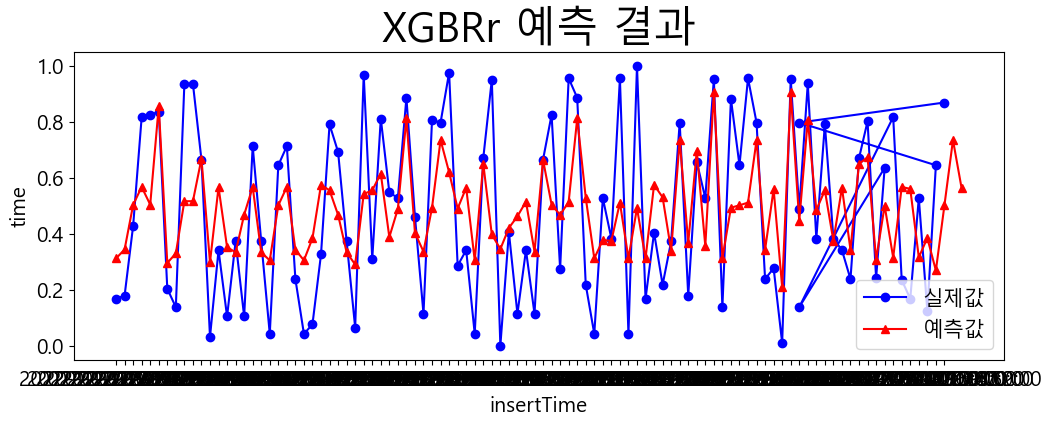

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,4))
chart = fig.add_subplot(1,1,1)
chart.plot(y_valid[:100], marker = 'o', color = 'b', label = '실제값')
chart.plot(y_pred[:100], marker = '^', color = 'r', label = '예측값')
chart.set_title('XGBRr 예측 결과', size = 30)
plt.xlabel('insertTime')
plt.ylabel('time')
plt.legend(loc = 'best')
plt.show()

In [ ]:
y_predict = pd.DataFrame(y_pred)
y_predict

,0
0,0.278603
1,0.324157
2,0.488336
3,0.601949
4,0.549726
...,...
14455,0.281260
14456,0.283197
14457,0.492184
14458,0.528178


In [ ]:
y_predict.columns = ['pred_arrivalTime']
y_predict = y_predict.round(5)
y_predict

,pred_arrivalTime
0,0.27860
1,0.32416
2,0.48834
3,0.60195
4,0.54973
...,...
14455,0.28126
14456,0.28320
14457,0.49218
14458,0.52818


In [ ]:
y_valid.columns

['valid_arrivalTime']

In [ ]:
y_valid_sorted_index = y_valid.sort_index(ascending=True).index
y_valid_sorted_index

Index(['2022-11-30 16:33:00', '2022-11-30 16:33:00', '2022-11-30 16:33:00',
       '2022-11-30 16:33:00', '2022-11-30 16:33:00', '2022-11-30 16:33:00',
       '2022-11-30 16:33:00', '2022-11-30 16:33:00', '2022-11-30 16:33:00',
       '2022-11-30 16:33:00',
       ...
       '2022-12-30 00:45:00', '2022-12-30 00:46:00', '2022-12-30 00:47:00',
       '2022-12-30 00:47:00', '2022-12-30 00:47:00', '2022-12-30 00:48:00',
       '2022-12-30 00:49:00', '2022-12-30 00:49:00', '2022-12-30 00:49:00',
       '2022-12-30 00:49:00'],
      dtype='object', name='insertTime', length=14460)

In [ ]:
y_valid_sorted_values = y_valid.sort_index(ascending=True)
y_valid_sorted_values.columns = ['valid_arrivalTime']

In [ ]:
y_valid_sorted_values.columns

['valid_arrivalTime']

In [ ]:
y_predict.index = y_valid_sorted_index

In [ ]:
y_predict

,pred_arrivalTime
insertTime,
2022-11-30 16:33:00,0.27860
2022-11-30 16:33:00,0.32416
2022-11-30 16:33:00,0.48834
2022-11-30 16:33:00,0.60195
2022-11-30 16:33:00,0.54973
...,...
2022-12-30 00:48:00,0.28126
2022-12-30 00:49:00,0.28320
2022-12-30 00:49:00,0.49218


In [ ]:
plt.plot(y_predict['pred_arrivalTime'], label = 'predicted', c= 'magenta')
plt.plot(y_valid_sorted_values, label = 'valid', c = 'g')
plt.grid()

plt.legend()
plt.show()

KeyError: 'valid_arrivalTime'

Error in callback <function _draw_all_if_interactive at 0x000002069198BE50> (for post_execute):


KeyboardInterrupt: 

In [ ]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    xgbr, 
    feature_names=[X_train.columns.values], 
    class_names=['0', '1'],
    filled=True
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph

ValueError: Length of feature_names, 1 does not match number of features, 252

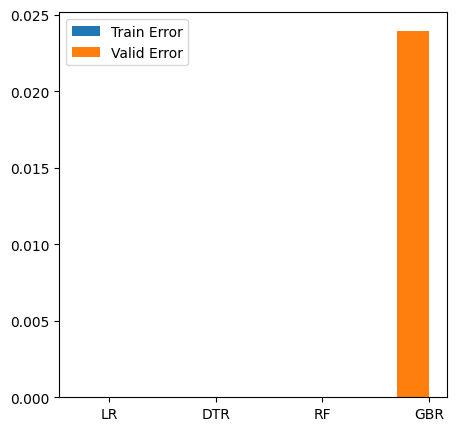

In [ ]:
fig = plt.figure()

index = np.arange(len(names))
width = 0.3

axe = fig.add_subplot(111)

# Bar chart
# Train error
plt.bar(index - width / 2, [v.mean() for v in train_results], width = 0.3, label = 'Train Error')

# Valid Error
plt.bar(index - width / 2, [v.mean() for v in valid_results], width = 0.3, label = 'Valid Error')

fig.set_size_inches(5,5)
plt.legend()

axe.set_xticks(index)
axe.set_xticklabels(names)

plt.show()

In [ ]:
import joblib
joblib.dump(GradientBoostingRegressor(), './GBRmodel.pkl')
# joblib.dump(model, './DTRmodel.pkl')

['./GBRmodel.pkl']

In [ ]:
# loaded_model1 = joblib.load('./MLPmodel.pkl')
loaded_model2 = joblib.load('./GBRmodel.pkl')
# score1 = loaded_model1.score(X,y)
score2 = loaded_model2.score(X,y)
# print('MLPmodel 정확도: {score:.3f}'.format(score=score1))
print('GBRmodel 정확도: {score:.3f}'.format(score=score2))

c:\Users\user\.conda\envs\pythonProject\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Bidirectional,Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# DO NOT CHANGE THIS.
def windowed_dataset(series, batch_size, n_past=10, n_future=10, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
SPLIT_TIME = int(len(total_dataset) * 0.8) # DO NOT CHANGE THIS
X_train = total_dataset[:SPLIT_TIME]
X_valid = total_dataset[SPLIT_TIME:]

In [ ]:
N_FEATURES = len(total_dataset.columns)
N_FEATURES

56

In [ ]:
BATCH_SIZE = 32  # 배치사이즈
N_PAST = 10      # 과거 데이터 (X)
N_FUTURE = 10    # 미래 데이터 (Y)
SHIFT = 1        # SHIFT

In [ ]:
# X_train = X_train.to_numpy()
# y_valid = y_valid.to_numpy()
# X_valid = X_valid.to_numpy()
# y_train = y_train.to_numpy()

In [ ]:
X_train.shape

(18064, 56)

In [ ]:
train_set = windowed_dataset(series=X_train, batch_size=BATCH_SIZE,
                             n_past=N_PAST, n_future=N_FUTURE,
                             shift=SHIFT)

valid_set = windowed_dataset(series=X_valid, batch_size=BATCH_SIZE,
                             n_past=N_PAST, n_future=N_FUTURE,
                             shift=SHIFT)

In [ ]:
train_set

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 56), dtype=tf.float64, name=None))>

In [ ]:
X_train.shape

(18064, 56)

In [ ]:
Dmodel = tf.keras.models.Sequential([
    Conv1D(filters=32, 
            kernel_size=3,
            padding="causal",
            activation="relu",
            input_shape=[N_PAST, 56],
            ),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(N_FEATURES)
])

In [ ]:
Dmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 10, 32)            5408      
                                                                 
 bidirectional (Bidirectiona  (None, 10, 64)           16640     
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 10, 32)            2080      
                                                                 
 dense_10 (Dense)            (None, 10, 16)            528       
                                                                 
 dense_11 (Dense)            (None, 10, 56)            952       
                                                                 
Total params: 25,608
Trainable params: 25,608
Non-trainable params: 0
__________________________________________________

In [ ]:
checkpoint_path = 'model/my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_mae',
                             verbose=1)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0005)
Dmodel.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

In [ ]:
history = Dmodel.fit(train_set,
                validation_data=(valid_set),
                epochs=500,
                callbacks=[checkpoint])

Epoch 1/500
    561/Unknown - 5s 4ms/step - loss: 159.7560 - mae: 159.8582
Epoch 1: val_mae improved from inf to 358.97168, saving model to model\my_checkpoint.ckpt
564/564 [==============================] - 6s 5ms/step - loss: 160.5693 - mae: 160.6714 - val_loss: 358.8584 - val_mae: 358.9717
Epoch 2/500
553/564 [============================>.] - ETA: 0s - loss: 138.1612 - mae: 138.2685
Epoch 2: val_mae improved from 358.97168 to 311.75479, saving model to model\my_checkpoint.ckpt
564/564 [==============================] - 3s 5ms/step - loss: 140.6902 - mae: 140.7976 - val_loss: 311.6250 - val_mae: 311.7548
Epoch 3/500
556/564 [============================>.] - ETA: 0s - loss: 130.6567 - mae: 130.7918
Epoch 3: val_mae improved from 311.75479 to 301.87909, saving model to model\my_checkpoint.ckpt
564/564 [==============================] - 3s 5ms/step - loss: 132.4649 - mae: 132.6001 - val_loss: 301.7028 - val_mae: 301.8791
Epoch 4/500
557/564 [============================>.] - ETA: 0s -

KeyboardInterrupt: 

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
model.evaluate(valid_set)